In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import string

# libraries for POS tagging and identification
import spacy
nlp = spacy.load('en_core_web_sm')

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from scipy import stats

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/monicabellare/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/monicabellare/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


ModuleNotFoundError: No module named 'spacy'

In [ ]:
df = pd.read_csv("../data/final_data.csv")

In [ ]:
df.head()

## Data Preprocessing

In [ ]:
body_df = df.drop(columns=['Url', 'Author', 'Date', 'Header', 'Source', 'n_links'])

In [ ]:
body_df.head()

In [ ]:
def process_text(text):
    # returns the lowercase
    text = text.lower()
    
    # removes punctuation
    nopunc_digit = [char for char in text if char not in string.punctuation and not char.isdigit()]
    nopunc_digit = ''.join(nopunc_digit)

    # retains adjectives and adverbs
    doc = nlp(nopunc_digit)
    adj_adv_words = [token.text for token in doc if (token.pos_ == 'ADJ' or token.pos_ == 'ADV')]
    adj_adv_words = ' '.join(adj_adv_words)
    
    # removes stopwords and lemmatizes remaining words; also gets the infinitive form of the verb; converts adv to adj (sadly -> sad)
    wnl = WordNetLemmatizer()
    lemmatized = [wnl.lemmatize(word) for word in adj_adv_words.split() if not wnl.lemmatize(word) in set(stopwords.words('english'))]
    lemmatized = ' '.join(lemmatized)
    
    return lemmatized

In [ ]:
body_df['cleaned_body'] = body_df['Body'].apply(lambda x: process_text(x))

In [ ]:
body_df.drop(columns=['Body', 'Quality'], inplace=True)

## Loading data

In [ ]:
body_df = pd.read_csv('../data/preprocessed_cleaned_body.csv')

## Preparing Training and Testing Data

In [3]:
X = body_df.iloc[:, body_df.columns != 'Bias']
y = body_df['Bias']

NameError: name 'body_df' is not defined

In [4]:
X.head()

NameError: name 'X' is not defined

In [5]:
bow_transformer = CountVectorizer(max_features = 800)
bow = bow_transformer.fit_transform(X['cleaned_body'])

X = pd.DataFrame(bow.toarray(), columns=bow_transformer.get_feature_names())

NameError: name 'CountVectorizer' is not defined

In [6]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=col_names)

In [7]:
X.head()

,ability,able,abortion,abuse,access,according,account,accused,across,act,...,would,wrong,wrote,year,yearold,yet,york,you,young,zealand
0,0.0,0.00,0.52381,0.0,0.2,0.000000,0.0,0.000000,0.142857,0.0,...,0.018182,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.00,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.153846,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.00,0.00000,0.0,0.0,0.041667,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.153846,0.051282,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.25,0.00000,0.0,0.1,0.000000,0.0,0.111111,0.000000,0.0,...,0.072727,0.0,0.000000,0.000000,0.0,0.090909,0.000000,0.0,0.0,0.0
4,0.0,0.00,0.00000,0.0,0.0,0.041667,0.0,0.000000,0.000000,0.0,...,0.181818,0.0,0.000000,0.102564,0.0,0.090909,0.043478,0.0,0.0,0.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Linear Regression

In [1]:
# Defining Model
regressor = LinearRegression()
# Training Model
regressor.fit(X_train, y_train)
# Making Predictions
y_pred = regressor.predict(X_test)
# Evaluating
print(stats.pearsonr(y_pred, y_test)[0])

NameError: name 'LinearRegression' is not defined

## Lasso Regression

In [10]:
# Defining Model
lasso = LassoCV(cv=5,
                alphas=np.logspace(-4,1,110),
                max_iter=10000,
                normalize=True)
# Training Model
lasso.fit(X_train, y_train)
# Number of features selected
coeffs = lasso.coef_!=0
coeff_used = np.sum(coeffs)
print('Number of coefficients: ', coeff_used)

# Fitting regressor
regressor.fit(X_train.loc[:, coeffs], y_train)
# Making predictions
y_pred = regressor.predict(X_test.loc[:, coeffs])
# Evaluating
score = stats.pearsonr(y_pred, y_test)[0]
print('Pearson coefficient: ', score)

Number of coefficients:  59
Pearson coefficient:  0.36907591556469105


In [11]:
X_test.loc[:, coeffs].columns

Index(['abortion', 'administration', 'allegation', 'article', 'called',
       'class', 'climate', 'clinton', 'conservative', 'continue', 'current',
       'democracy', 'democrat', 'denied', 'don', 'donald', 'everything',
       'february', 'fight', 'free', 'fund', 'ha', 'illegal', 'including',
       'independent', 'international', 'liberal', 'like', 'march', 'million',
       'money', 'network', 'page', 'people', 'please', 'possible',
       'presidency', 'project', 'reporting', 'republican', 'request', 'right',
       'show', 'someone', 'subject', 'support', 'sure', 'trump', 'try',
       'understand', 'victim', 'view', 'voter', 'weapon', 'white', 'whole',
       'whose', 'word', 'worker'],
      dtype='object')

In [12]:
## NOTES: 
# Filtering for ADJ/ADV made model worse

## Including other numeric indicators as features (n_links, Quality)

In [21]:
X = body_df.iloc[:, body_df.columns != 'Bias']
y = body_df['Bias']

bow_transformer = CountVectorizer(max_features = 800)
bow = bow_transformer.fit_transform(X['cleaned_body'])

X = pd.DataFrame(bow.toarray(), columns=bow_transformer.get_feature_names())

In [22]:
X['n_links'] = df['n_links']
X['Quality'] = df['Quality']

In [24]:
col_names = X.columns

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns=col_names)

In [25]:
X.head()

,ability,able,abortion,abuse,access,according,account,accused,across,act,...,wrote,year,yearold,yet,york,you,young,zealand,n_links,Quality
0,0.0,0.00,0.52381,0.0,0.2,0.000000,0.0,0.000000,0.142857,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.005445,0.791837
1,0.0,0.00,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.153846,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.003630,0.835429
2,0.0,0.00,0.00000,0.0,0.0,0.041667,0.0,0.000000,0.000000,0.0,...,0.153846,0.051282,0.0,0.000000,0.000000,0.0,0.0,0.0,0.010889,0.702041
3,0.0,0.25,0.00000,0.0,0.1,0.000000,0.0,0.111111,0.000000,0.0,...,0.000000,0.000000,0.0,0.090909,0.000000,0.0,0.0,0.0,0.018149,0.851755
4,0.0,0.00,0.00000,0.0,0.0,0.041667,0.0,0.000000,0.000000,0.0,...,0.000000,0.102564,0.0,0.090909,0.043478,0.0,0.0,0.0,0.009074,0.514286


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Linear Regression

In [27]:
# Defining Model
regressor = LinearRegression()
# Training Model
regressor.fit(X_train, y_train)
# Making Predictions
y_pred = regressor.predict(X_test)
# Evaluating
print(stats.pearsonr(y_pred, y_test)[0])

0.1821646472140747


## Lasso Regression

In [28]:
# Defining Model
lasso = LassoCV(cv=5,
                alphas=np.logspace(-4,1,110),
                max_iter=10000,
                normalize=True)
# Training Model
lasso.fit(X_train, y_train)
# Number of features selected
coeffs = lasso.coef_!=0
coeff_used = np.sum(coeffs)
print('Number of coefficients: ', coeff_used)

# Fitting regressor
regressor.fit(X_train.loc[:, coeffs], y_train)
# Making predictions
y_pred = regressor.predict(X_test.loc[:, coeffs])
# Evaluating
score = stats.pearsonr(y_pred, y_test)[0]
print('Pearson coefficient: ', score)

Number of coefficients:  59
Pearson coefficient:  0.3690759155646909


In [29]:
X_test.loc[:, coeffs].columns

Index(['abortion', 'administration', 'allegation', 'article', 'called',
       'class', 'climate', 'clinton', 'conservative', 'continue', 'current',
       'democracy', 'democrat', 'denied', 'don', 'donald', 'everything',
       'february', 'fight', 'free', 'fund', 'ha', 'illegal', 'including',
       'independent', 'international', 'liberal', 'like', 'march', 'million',
       'money', 'network', 'page', 'people', 'please', 'possible',
       'presidency', 'project', 'reporting', 'republican', 'request', 'right',
       'show', 'someone', 'subject', 'support', 'sure', 'trump', 'try',
       'understand', 'victim', 'view', 'voter', 'weapon', 'white', 'whole',
       'whose', 'word', 'worker'],
      dtype='object')

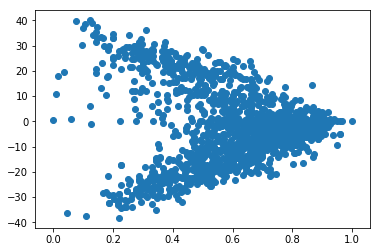

In [32]:
plt.scatter(X['Quality'], y)